In [1]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
import math
from sklearn.metrics import mean_squared_error
from pandas_datareader import data as pdr
import yfinance as yf
import datetime 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


init_notebook_mode(connected=True):

This function initializes Plotly for use in the notebook and connects to the Plotly servers to load necessary resources (like CSS and JavaScript) that allow Plotly visualizations to be interactive within Jupyter Notebooks.

Plotly Offline Mode:

By using connected=True, it will allow you to create visualizations without requiring an internet connection (but it does rely on Plotly's cloud resources for rendering).

If you want fully offline capabilities (no internet access at all), you can install the plotly library offline and set connected=False.

# 1. Introduction to date and time¶



# 1.1 Importing time series data

* Data being used:-
* Google Stocks Data
* Humidity in different world citi
* Microsoft Stocks Data
* Pressure in different world cities

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("szrlee/stock-time-series-20050101-to-20171231")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sharm\.cache\kagglehub\datasets\szrlee\stock-time-series-20050101-to-20171231\versions\3


In [7]:
import os

# Check the directory where the dataset is saved
dataset_path = path  # This will be the directory where the dataset is saved
print(f"Dataset downloaded to: {dataset_path}")

# List the files in the dataset folder
print(os.listdir(dataset_path))


Dataset downloaded to: C:\Users\sharm\.cache\kagglehub\datasets\szrlee\stock-time-series-20050101-to-20171231\versions\3
['AABA_2006-01-01_to_2018-01-01.csv', 'AAPL_2006-01-01_to_2018-01-01.csv', 'all_stocks_2006-01-01_to_2018-01-01.csv', 'all_stocks_2017-01-01_to_2018-01-01.csv', 'AMZN_2006-01-01_to_2018-01-01.csv', 'AXP_2006-01-01_to_2018-01-01.csv', 'BA_2006-01-01_to_2018-01-01.csv', 'CAT_2006-01-01_to_2018-01-01.csv', 'CSCO_2006-01-01_to_2018-01-01.csv', 'CVX_2006-01-01_to_2018-01-01.csv', 'DIS_2006-01-01_to_2018-01-01.csv', 'GE_2006-01-01_to_2018-01-01.csv', 'GOOGL_2006-01-01_to_2018-01-01.csv', 'GS_2006-01-01_to_2018-01-01.csv', 'HD_2006-01-01_to_2018-01-01.csv', 'IBM_2006-01-01_to_2018-01-01.csv', 'INTC_2006-01-01_to_2018-01-01.csv', 'JNJ_2006-01-01_to_2018-01-01.csv', 'JPM_2006-01-01_to_2018-01-01.csv', 'KO_2006-01-01_to_2018-01-01.csv', 'MCD_2006-01-01_to_2018-01-01.csv', 'MMM_2006-01-01_to_2018-01-01.csv', 'MRK_2006-01-01_to_2018-01-01.csv', 'MSFT_2006-01-01_to_2018-01-01.csv

In [8]:
# Correct path to the specific file inside the dataset folder
google_file = os.path.join(dataset_path, 'GOOGL_2006-01-01_to_2018-01-01.csv')

# Load the Google stock data into a pandas DataFrame
google = pd.read_csv(google_file, index_col='Date', parse_dates=['Date'])

# Check the first few rows of the data
print(google.head())


              Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL


In [9]:
humidity = pd.read_csv(r"C:\Users\sharm\PycharmProjects\Machine Learning\Machine Learning\humidity.csv\humidity.csv", index_col='datetime', parse_dates=['datetime'])
humidity.tail()


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,...,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,...,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,...,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


# 1.2 Cleaning and preparing time series data

In [11]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method= 'ffill')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


# 1.3 Visualizing the datasets

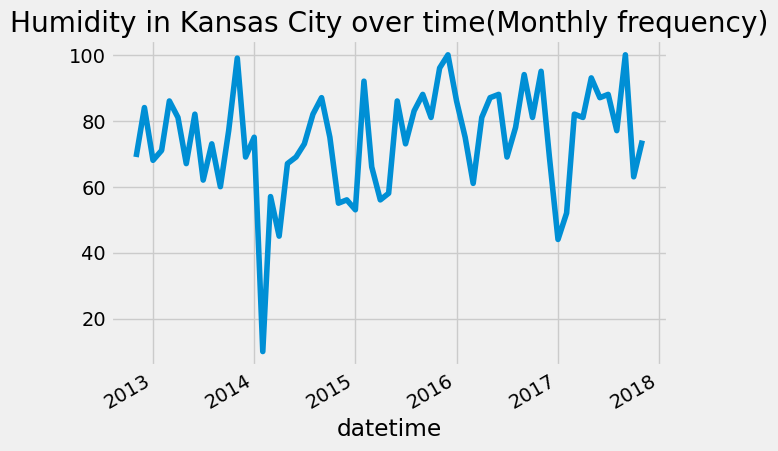

In [13]:
humidity['Kansas City'].asfreq('M').plot()# asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

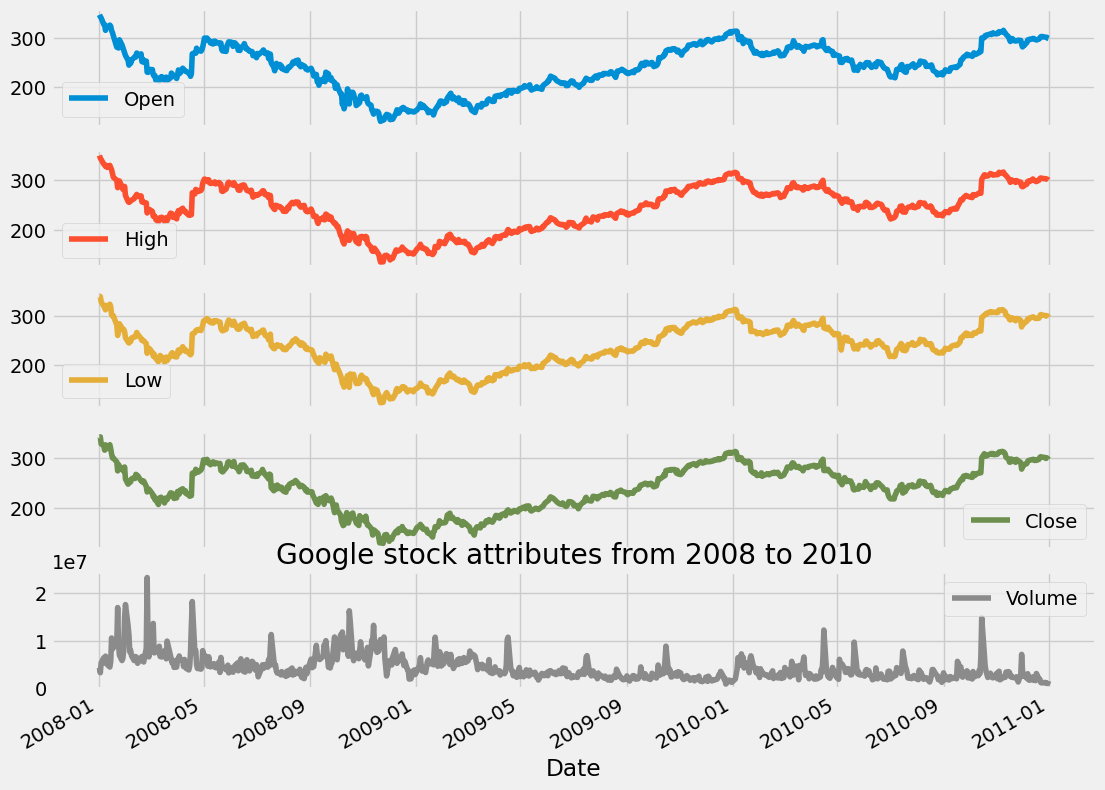

In [14]:
google['2008':'2010'].plot(subplots=True, figsize=(12,10))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

# 1.4 Timestamps and Periods


Timestamps are used to represent a point in time. Periods represent an interval in time. Periods can used to check if a specific event in the given period. They can also be converted to each other's form

In [16]:
# Creating Timestamps 
timestamp = pd.Timestamp(2017,1,1,12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [17]:
#creating Period

period = pd.Period('2017-01-01')
period


Period('2017-01-01', 'D')

In [18]:
#Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [19]:
# Converting timestamp to period

new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'h')

In [20]:
# Converting period to timestamp

new_timestamp = period.to_timestamp(freq='H',how = 'start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

# 1.5 Using date_range

date_range is a method that returns a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

In [22]:
# Creating a datetimeindex with daily frequency

dr1 = pd.date_range(start = '1/1/18', end = '1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [23]:
# Creating a datetimeindex with Monthly frequency

dr2 = pd.date_range(start = '1/1/18', end = '1/9/19', freq = 'M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [24]:
# Creating a datetimeindex without specifying start date and using periods

dr3 = pd.date_range(end = '1/4/2018', periods = 8)
dr3

DatetimeIndex(['2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31',
               '2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04'],
              dtype='datetime64[ns]', freq='D')

In [25]:
# Creating a datetimeindex specifying start date , end date and periods

dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

# 1.6 Using to_datetime

In [27]:
df = pd.DataFrame({'year' : [2015,2016], 'month' : [2,3], 'day' : [4,5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [28]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [29]:
df = pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

# 1.7 Shifting and lags

We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time series with a past of itsel

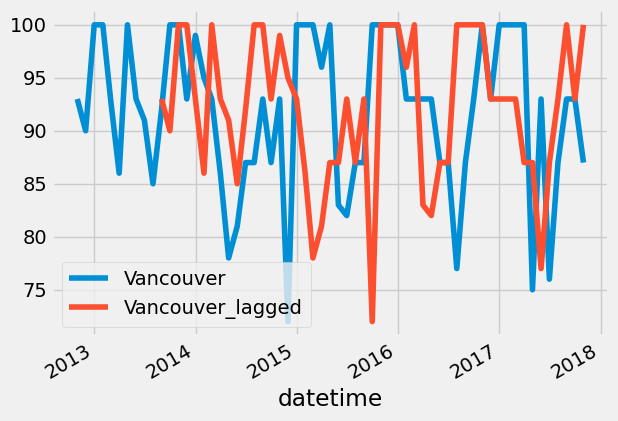

In [31]:
humidity['Vancouver'].asfreq('M').plot(legend=True)
shifted = humidity['Vancouver'].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

# 1.8 Resampling

Upsampling - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

Downsampling - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.

In [33]:
pressure = pd.read_csv(r"C:\Users\sharm\PycharmProjects\Machine Learning\Machine Learning\Time Series Forecasting for Stock Prices\pressure.csv", index_col='datetime', parse_dates=['datetime'])
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,1031.0,NaN,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,...,1021.0,NaN,1021.0,1017.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,1030.0,NaN,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,...,1021.0,NaN,1023.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,1030.0,NaN,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,...,1022.0,NaN,1024.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,1029.0,NaN,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,...,1023.0,NaN,1026.0,1022.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,1029.0,NaN,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,...,1024.0,NaN,1027.0,1023.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method= 'ffill')
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,1021.0,1031.0,1013.0,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,...,1021.0,1020.0,1021.0,1017.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 21:00:00,1021.0,1030.0,1013.0,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,...,1021.0,1020.0,1023.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 22:00:00,1021.0,1030.0,1013.0,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,...,1022.0,1020.0,1024.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 23:00:00,1021.0,1029.0,1013.0,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,...,1023.0,1020.0,1026.0,1022.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-30 00:00:00,1021.0,1029.0,1013.0,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,...,1024.0,1020.0,1027.0,1023.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0


we used ffill parameter which propagates last valid observation to fill gaps. Then we use bfill to propogate next valid observation to fill gaps.

In [36]:
pressure = pressure.fillna(method= 'bfill')
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 17:00:00,807.0,1024.0,1009.0,1029.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,863.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [37]:
pressure.shape

(45252, 36)

In [38]:
# We downsample from hourly to 3 day frequency aggregated using mean
pressure = pressure.resample('3D').mean()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,...,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.000000,1013.000000,990.525424
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.000000,1013.000000,990.083333
2012-10-07,1013.930556,1017.444444,1016.597222,1018.736111,1013.416667,1014.222222,1012.888889,1011.861111,1005.833333,1020.458333,...,1017.958333,1016.750000,1014.152778,1016.305556,982.972222,1013.027778,1007.555556,1013.000000,1013.000000,989.833333
2012-10-10,1015.000000,1015.430556,1014.833333,1018.416667,1010.694444,1014.013889,1000.166667,1005.611111,986.000000,984.486111,...,1018.694444,1017.916667,1016.166667,1017.319444,979.763889,1006.527778,998.763889,1012.333333,1012.333333,987.888889
2012-10-13,1008.152778,1018.111111,1021.069444,1015.930556,1017.277778,1018.375000,1015.666667,1015.500000,1013.625000,1010.444444,...,1025.055556,1024.388889,1020.805556,1023.736111,984.527778,1013.027778,1007.194444,1013.000000,1013.000000,990.430556


In [39]:
pressure.shape

(629, 36)

pressure = pressure.resample('D').ffill()
pressure.head()

In [41]:
pressure.shape

(629, 36)

# 2. Finance and statistics 

# 2.1 Percent change

<Axes: xlabel='Date'>

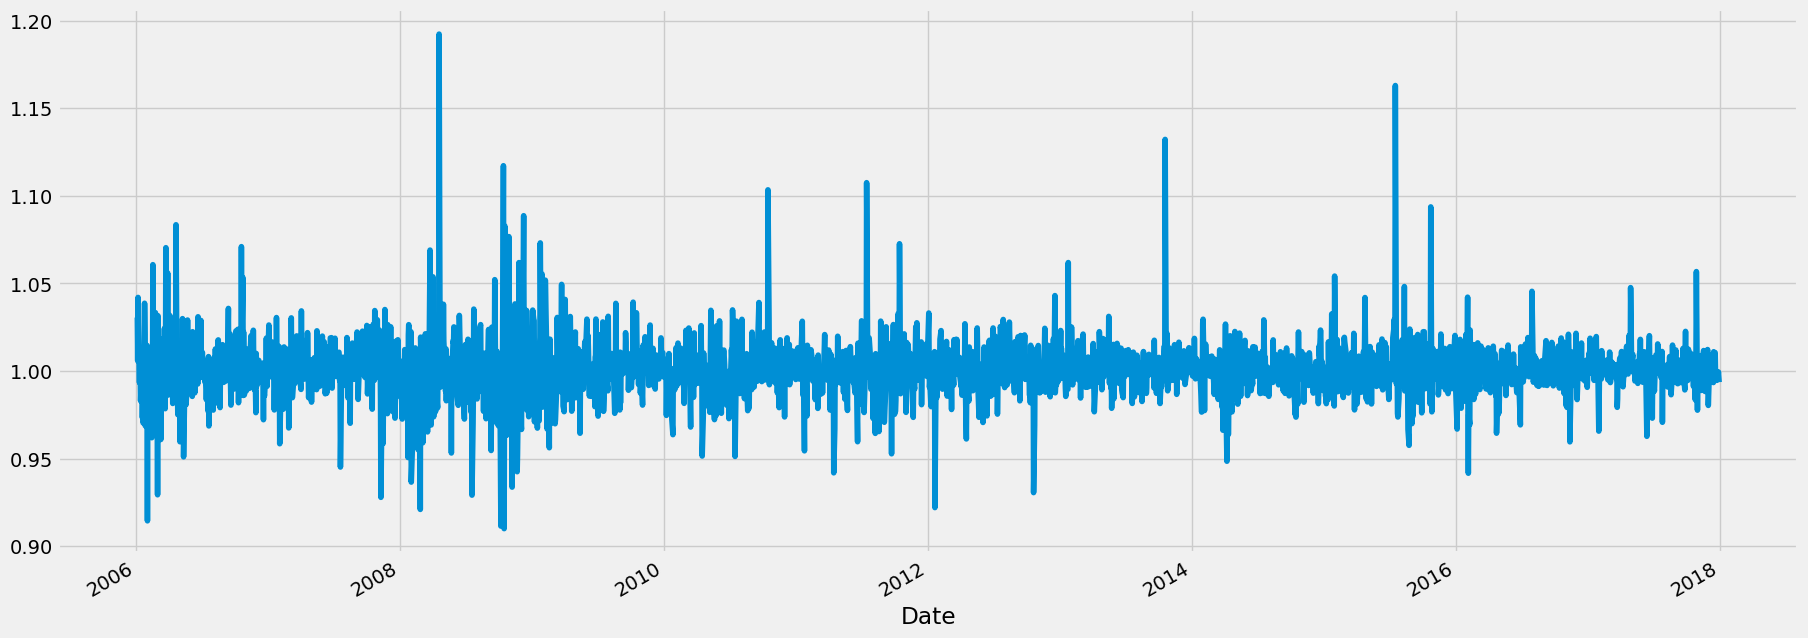

In [44]:
google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(20,8))

<Axes: xlabel='Date'>

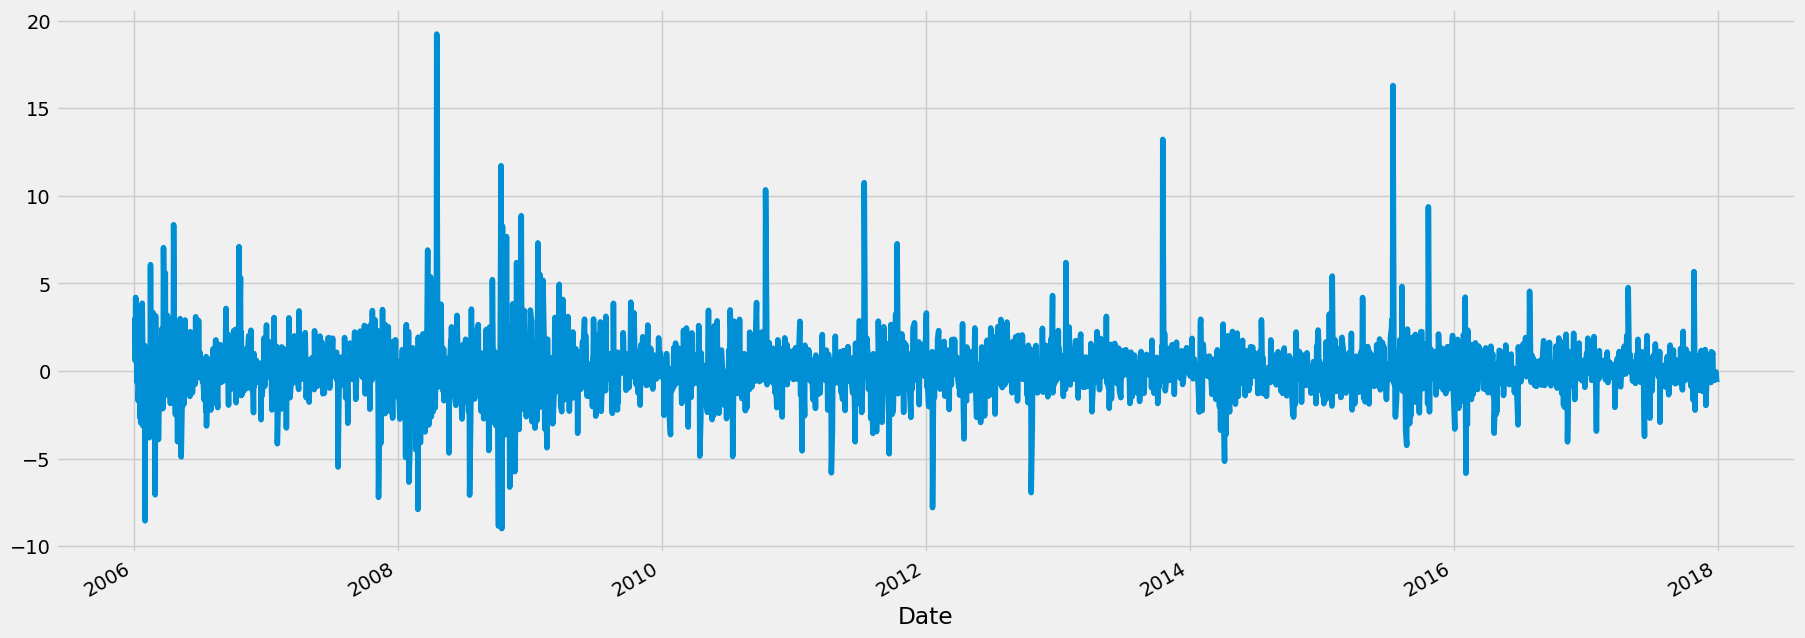

In [45]:
google['Return'] = google.Change.sub(1).mul(100)
google['Return'].plot(figsize=(20,8))

<Axes: xlabel='Date'>

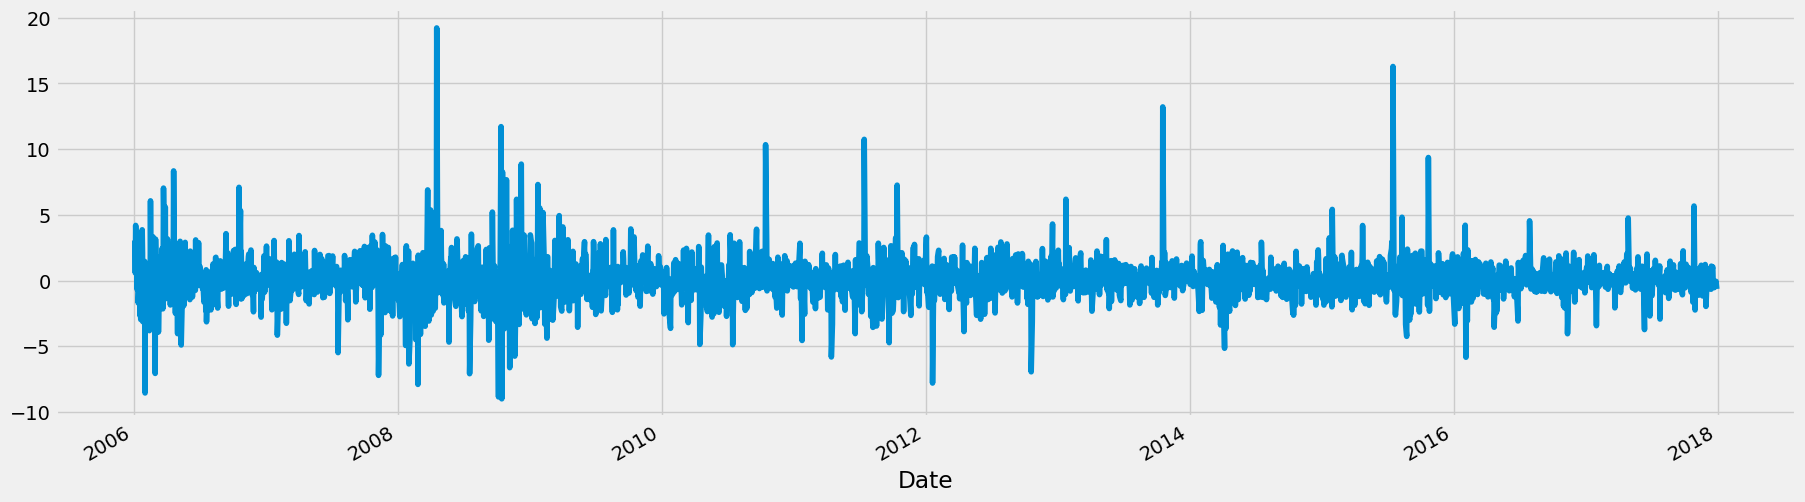

In [46]:
google.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns

<Axes: xlabel='Date'>

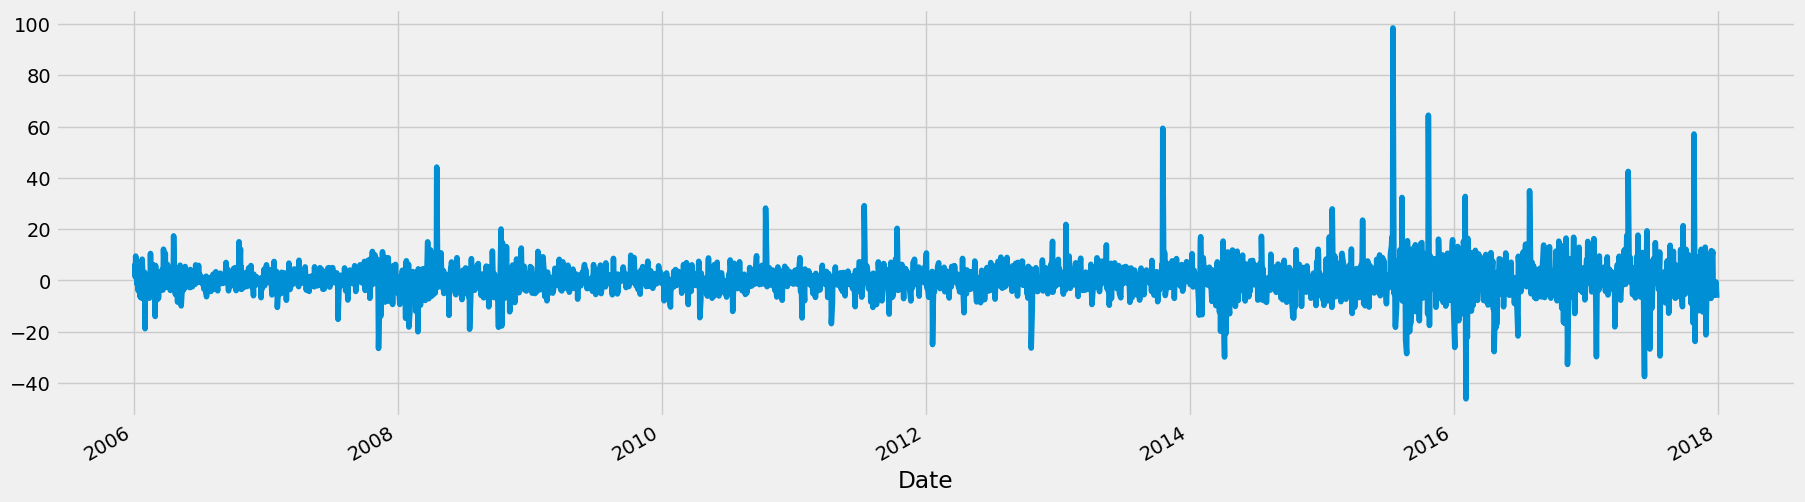

In [47]:
google.High.diff().plot(figsize= (20,6))

# 2.4 Comaring two or more time series¶


We will compare 2 time series by normalizing them. This is achieved by dividing each time series element of all time series by the first element. This way both series start at the same point and can be easily compared.

In [49]:
microsoft = pd.read_csv(r"C:\Users\sharm\PycharmProjects\Machine Learning\Machine Learning\Time Series Forecasting for Stock Prices\archive (6)\MSFT_2006-01-01_to_2018-01-01.csv",index_col = 'Date',parse_dates = ['Date'])
microsoft

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT
...,...,...,...,...,...,...
2017-12-22,85.40,85.63,84.92,85.51,14145841,MSFT
2017-12-26,85.31,85.53,85.03,85.40,9891237,MSFT
2017-12-27,85.65,85.98,85.22,85.71,14678025,MSFT


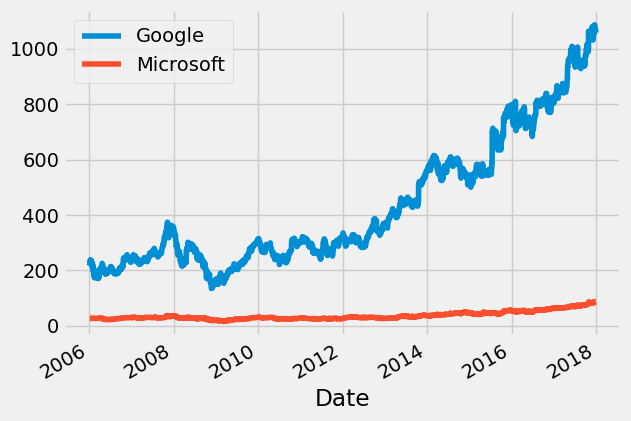

In [50]:
google.High.plot()
microsoft.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

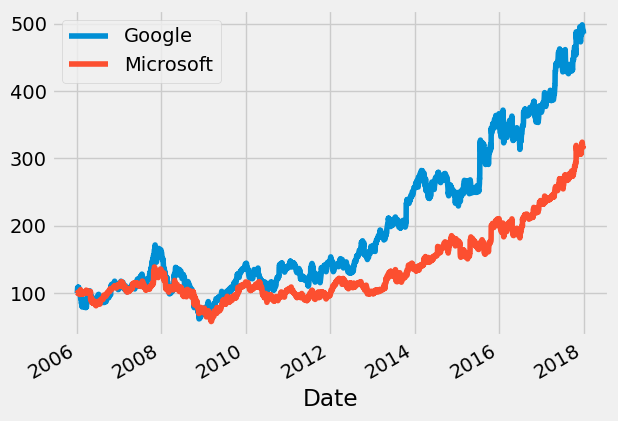

In [51]:
# Normalizing and comparison
# Both stocks start from 100

normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_micrsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_micrsoft.plot()
plt.legend(['Google','Microsoft'])
plt.show()

You can clearly see how google outperforms microsoft over time.

# 2.5 Window functions
Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

Rolling - Same size and sliding

Expanding - Contains all prior values

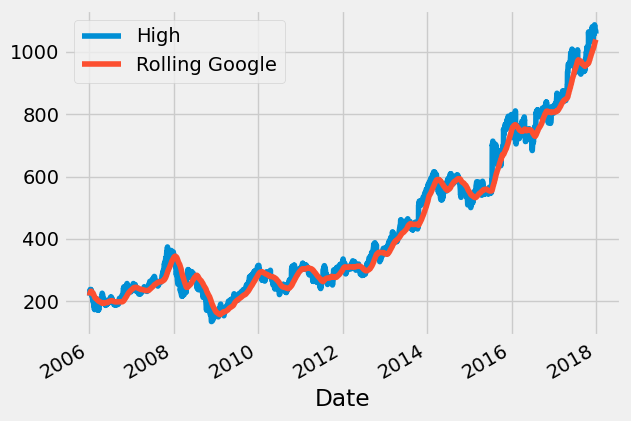

In [54]:
# Rolling window functions

rolling_google = google.High.rolling('90D').mean()
google.High.plot()
rolling_google.plot()
plt.legend(['High','Rolling Google'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

Now, observe that rolling mean plot is a smoother version of the original plot.

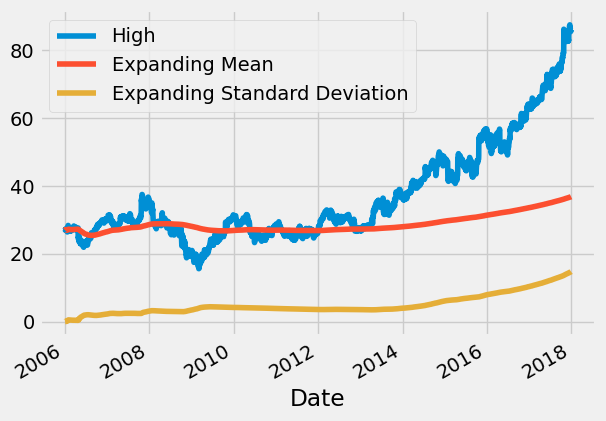

In [56]:
# Expanding window functions
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

# 2.6 OHLC charts

An OHLC chart is any type of price chart that shows the open, high, low and close price of a certain time period. Open-high-low-close Charts (or OHLC Charts) are used as a trading tool to visualise and analyse the price changes over time for securities, currencies, stocks, bonds, commodities, etc. OHLC Charts are useful for interpreting the day-to-day sentiment of the market and forecasting any future price changes through the patterns produced.

The y-axis on an OHLC Chart is used for the price scale, while the x-axis is the timescale. On each single time period, an OHLC Charts plots a symbol that represents two ranges: the highest and lowest prices traded, and also the opening and closing price on that single time period (for example in a day). On the range symbol, the high and low price ranges are represented by the length of the main vertical line. The open and close prices are represented by the vertical positioning of tick-marks that appear on the left (representing the open price) and on right (representing the close price) sides of the high-low vertical line.

Colour can be assigned to each OHLC Chart symbol, to distinguish whether the market is "bullish" (the closing price is higher then it opened) or "bearish" (the closing price is lower then it ope


ned).

In [58]:
google_june_2008 = google.loc['2008-06-01':'2008-06-30']

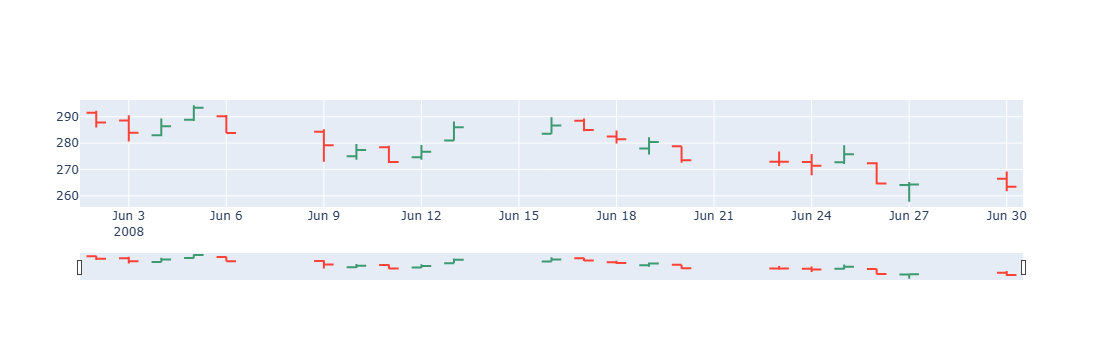

In [59]:
# Assuming you have a DataFrame `google` with the necessary data
trace = go.Ohlc(
    x=google_june_2008.index,  # Now using the filtered data
    open=google_june_2008.Open,
    high=google_june_2008.High,
    low=google_june_2008.Low,
    close=google_june_2008.Close
)

data = [trace]
iplot(data, filename='simple_ohlc')

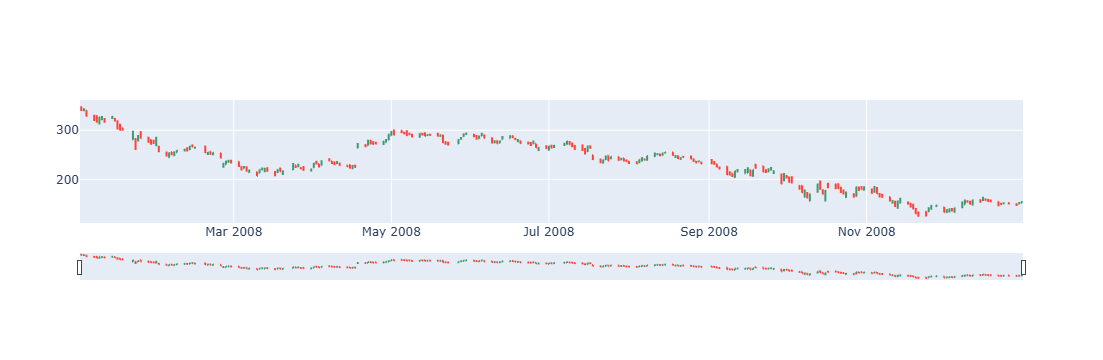

In [60]:
# Convert the index to datetime if it's not already a datetime object
google.index = pd.to_datetime(google.index)

# Filter the data for the year 2008
google_2008 = google.loc['2008']

# Create the OHLC chart trace for the year 2008
trace = go.Ohlc(
    x=google_2008.index,  # Using the datetime index for x-axis
    open=google_2008['Open'],  # 'Open' prices
    high=google_2008['High'],  # 'High' prices
    low=google_2008['Low'],    # 'Low' prices
    close=google_2008['Close'] # 'Close' prices
)

# Prepare the data for plotting
data = [trace]

# Plot the OHLC chart inline in the Jupyter notebook
iplot(data, filename='simple_ohlc')

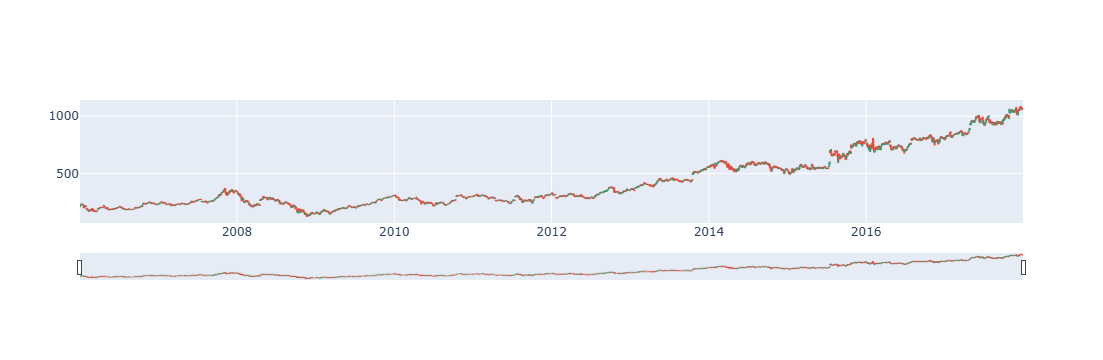

In [61]:
# OHLC chart of 2008
trace = go.Ohlc(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

# 2.7 Candlestick charts

2.7 Candlestick charts
This type of chart is used as a trading tool to visualise and analyse the price movements over time for securities, derivatives, currencies, stocks, bonds, commodities, etc. Although the symbols used in Candlestick Charts resemble a Box Plot, they function differently and therefore, are not to be confused with one another.

Candlestick Charts display multiple bits of price information such as the open price, close price, highest price and lowest price through the use of candlestick-like symbols. Each symbol represents the compressed trading activity for a single time period (a minute, hour, day, month, etc). Each Candlestick symbol is plotted along a time scale on the x-axis, to show the trading activity over time.

The main rectangle in the symbol is known as the real body, which is used to display the range between the open and close price of that time period. While the lines extending from the bottom and top of the real body is known as the lower and upper shadows (or wick). Each shadow represents the highest or lowest price traded during the time period represented. When the market is Bullish (the closing price is higher than it opened), then the body is coloured typically white or green. But when the market is Bearish (the closing price is lower than it opened), then the body is usually coloured either black or

Candlestick Charts are great for detecting and predicting market trends over time and are useful for interpreting the day-to-day sentiment of the market, through each candlestick symbol's colouring and shape. For example, the longer the body is, the more intense the selling or buying pressure is. While, a very short body, would indicate that there is very little price movement in that time period and represents consolidation.

Candlestick Charts help reveal the market psychology (the fear and greed experienced by sellers and buyers) through the various indicators, such as shape and colour, but also by the many identifiable patterns that can be found in Candlestick Charts. In total, there are 42 recognised patterns that are divided into simple and complex patterns. These patterns found in Candlestick Charts are useful for displaying price relationships and can be used for predicting the possible future movement of the market. You can find a list and description of each pattern here.

Please bear in mind, that Candlestick Charts don't express the events taking place between the open and close price - only the relationship between the two prices. So you can't tell how volatile trading was within that single time period. red.

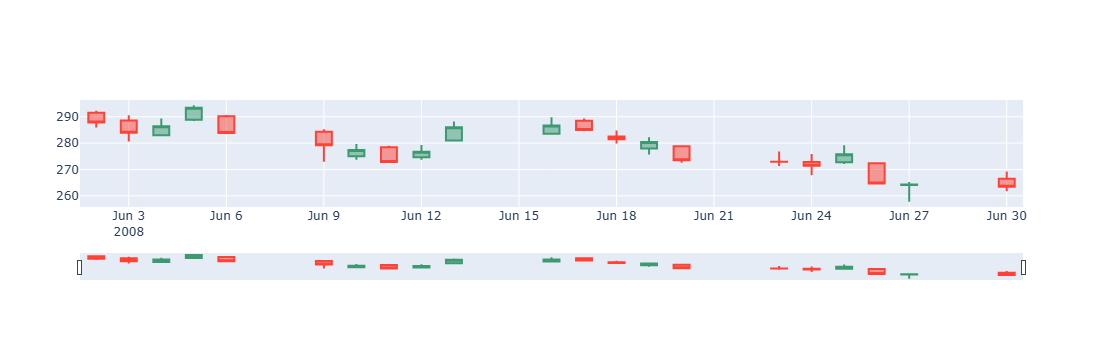

In [63]:
# Candlestick chart of march 2008
trace = go.Candlestick(
    x=google_june_2008.index,  # Now using the filtered data
    open=google_june_2008.Open,
    high=google_june_2008.High,
    low=google_june_2008.Low,
    close=google_june_2008.Close
)

data = [trace]                    
iplot(data, filename='simple_candlestick')

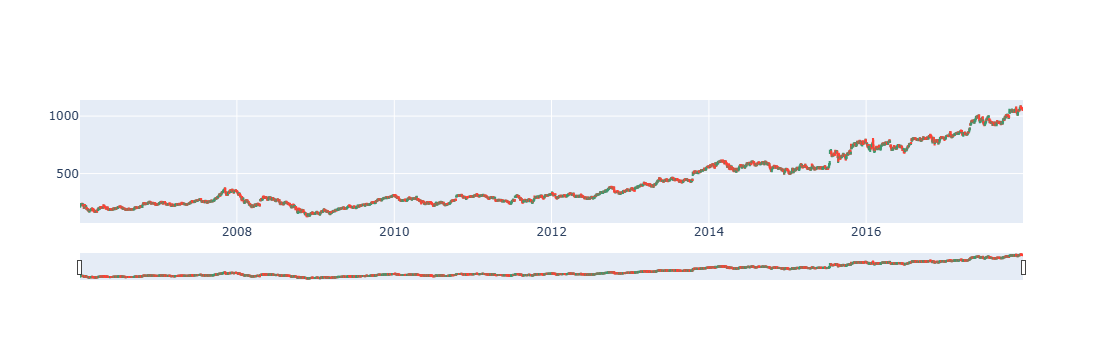

In [64]:
# Candlestick chart of 2006-2018
trace = go.Candlestick(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_candlestick')

# 2.8 Autocorrelation and Partial Autocorrelation
Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.

Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

# Autocorrelation

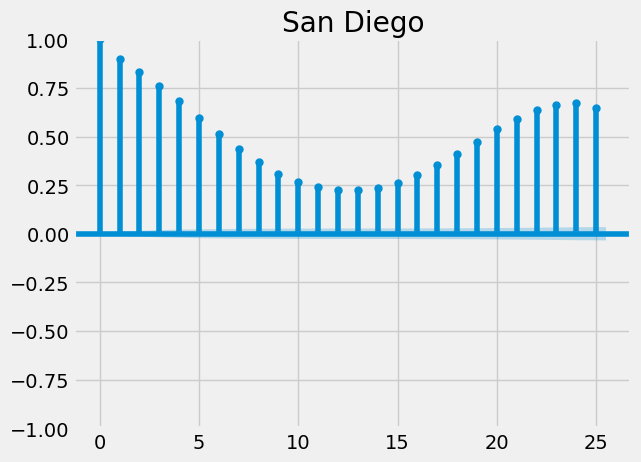

In [67]:
# Autocorrelation of humidity of San Diego
plot_acf(humidity["San Diego"],lags=25, title = "San Diego")
plt.show()

As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

# Partial Autocorrelation

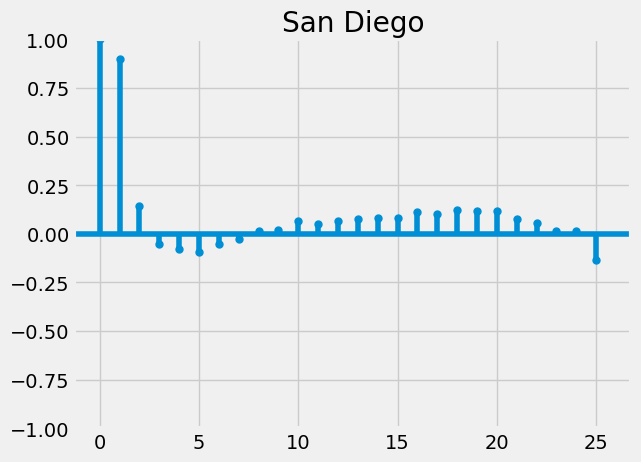

In [70]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity["San Diego"],lags=25, title = "San Diego")
plt.show()

Here, only 0th, 1st and 20th lag are statistically significant

# 3. Time series decomposition and Random walks

# 3.1. Trends, seasonality and noise

These are the components of a time series.

* Trend - Consistent upwards or downwards slope of a time series.
* Seasonality - Clear periodic pattern of a time series(like sine funtion).
* Noise - Outliers or missing values.es

<Axes: xlabel='Date'>

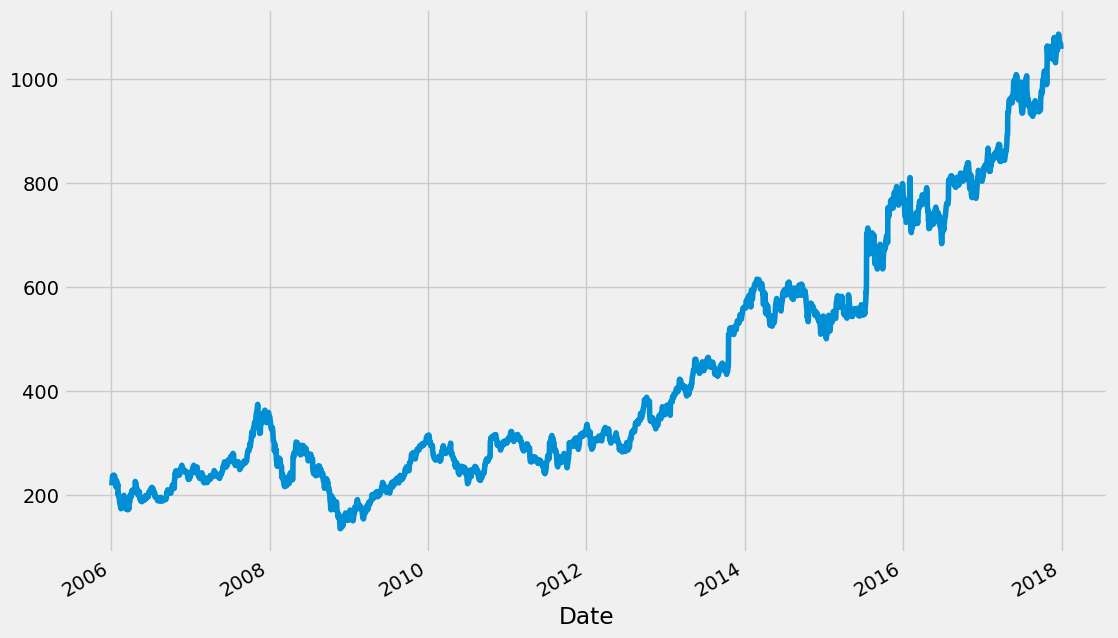

In [75]:
# Let's take Google stocks High for this

google['High'].plot(figsize = (12,8))

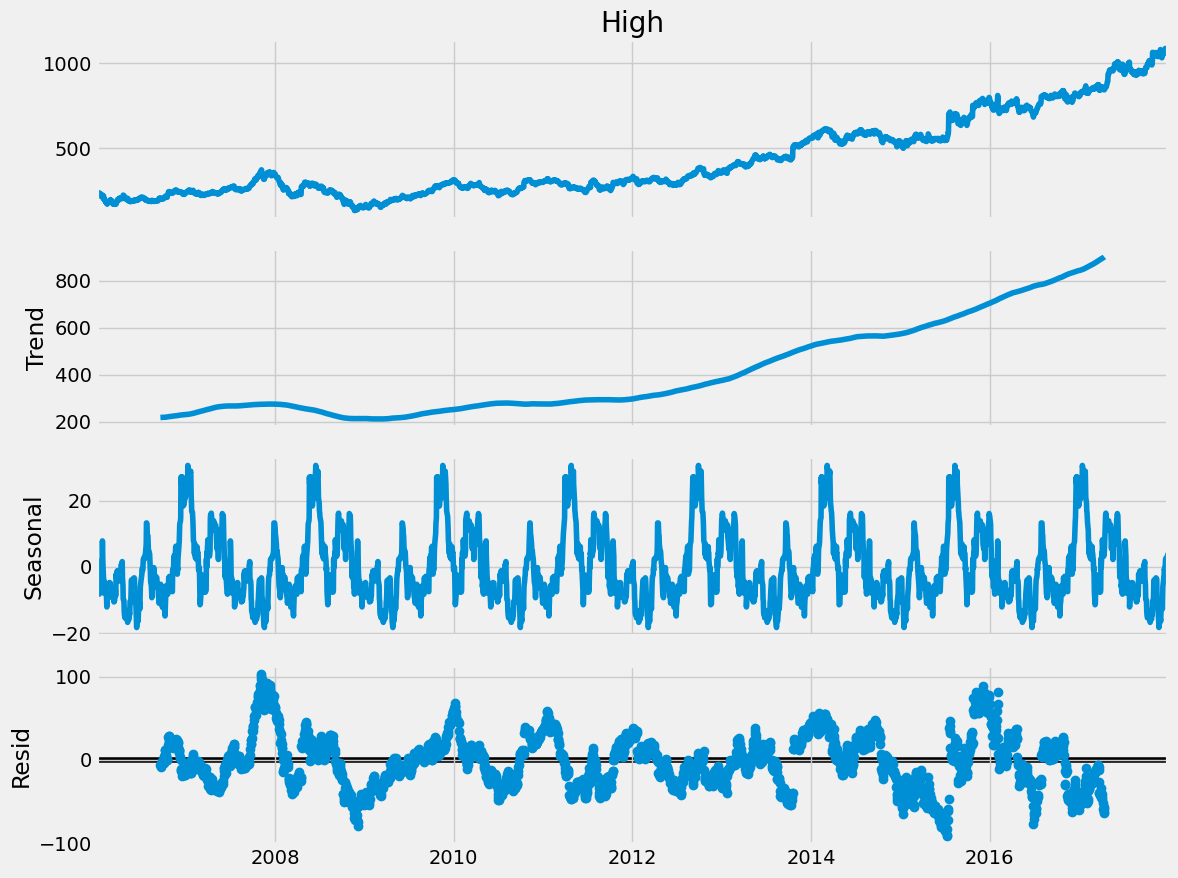

In [76]:
# Now for decompostion


# Setting figure size for plots
plt.rcParams['figure.figsize'] = (12, 9)

# Assuming google is a DataFrame with a 'High' column and datetime index
# Decompose the 'High' column with appropriate frequency
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"], period=360)  # Adjust period if necessary

# Plot the decomposition results
figure = decomposed_google_volume.plot()
plt.show()




* There is clearly an upward trend in the above plot.* 
You can also see the uniform seasonal change
* Non-uniform noise that represent outliers and missing valueses

# 3.2. White noise

White noise has...e lags

* Constant mean
* Constant variance
* Zero auto-correlation at all lags

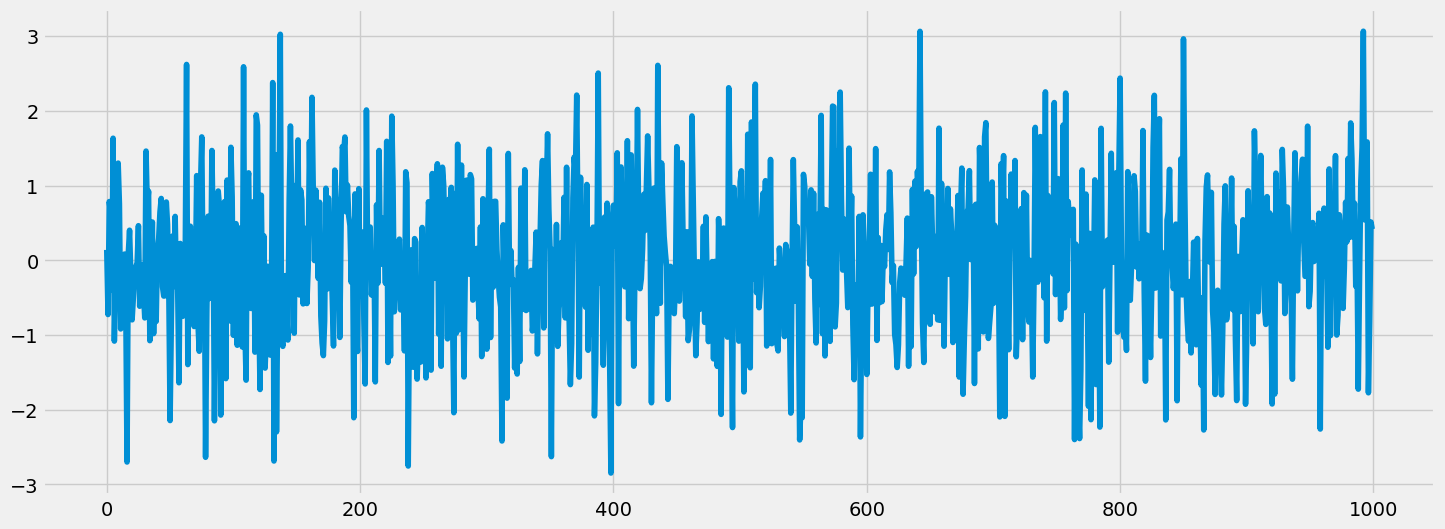

In [80]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

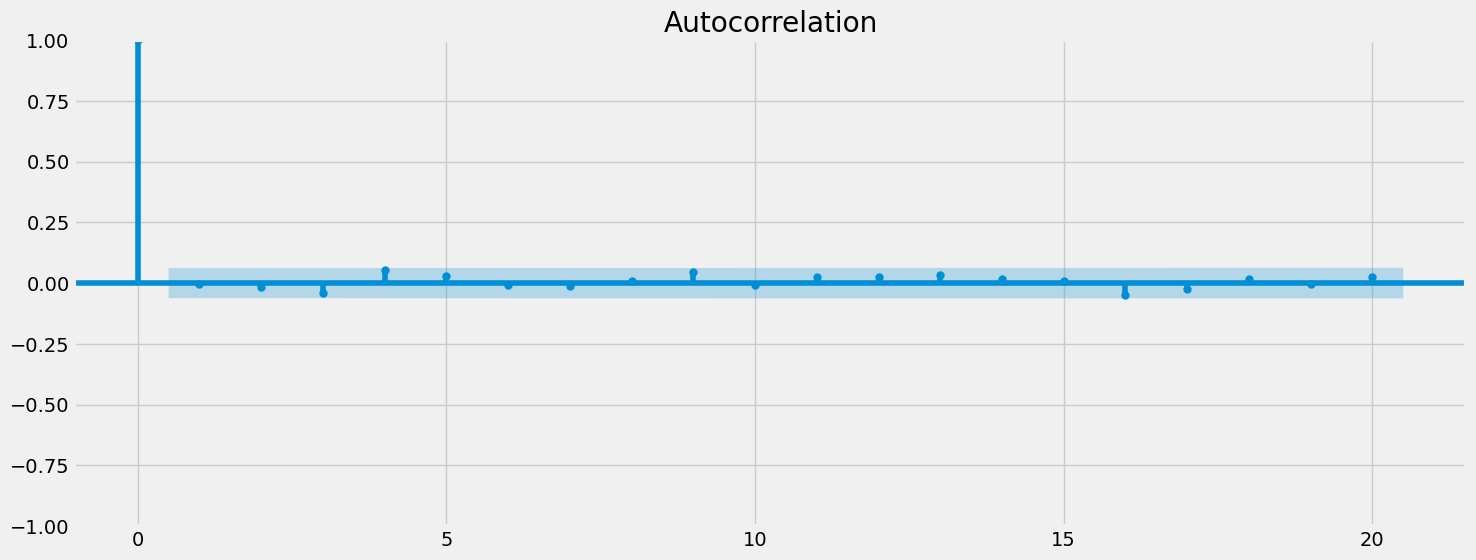

In [81]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

# 3.4 Stationarity

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
* Strong stationarity: is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently,   parameters such as mean and variance also do not change over time.
* Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time
Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.mries.

We will try to decompose seasonal component of the above decomposed time series.

<Axes: xlabel='Date'>

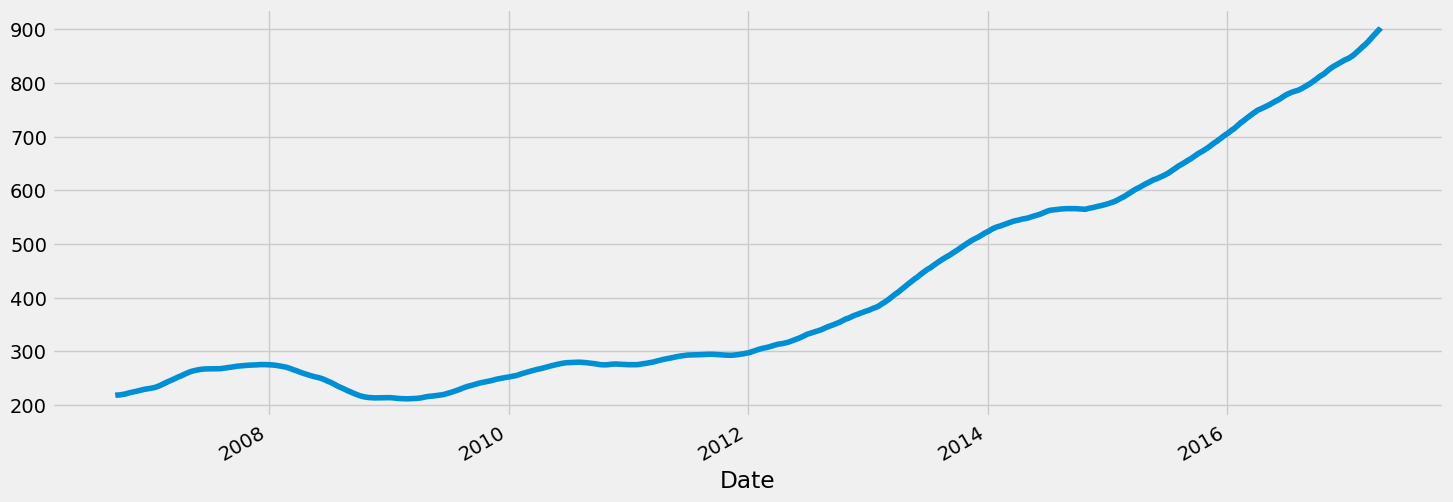

In [83]:
# The original non-stationary plot
decomposed_google_volume.trend.plot()

<Axes: xlabel='Date'>

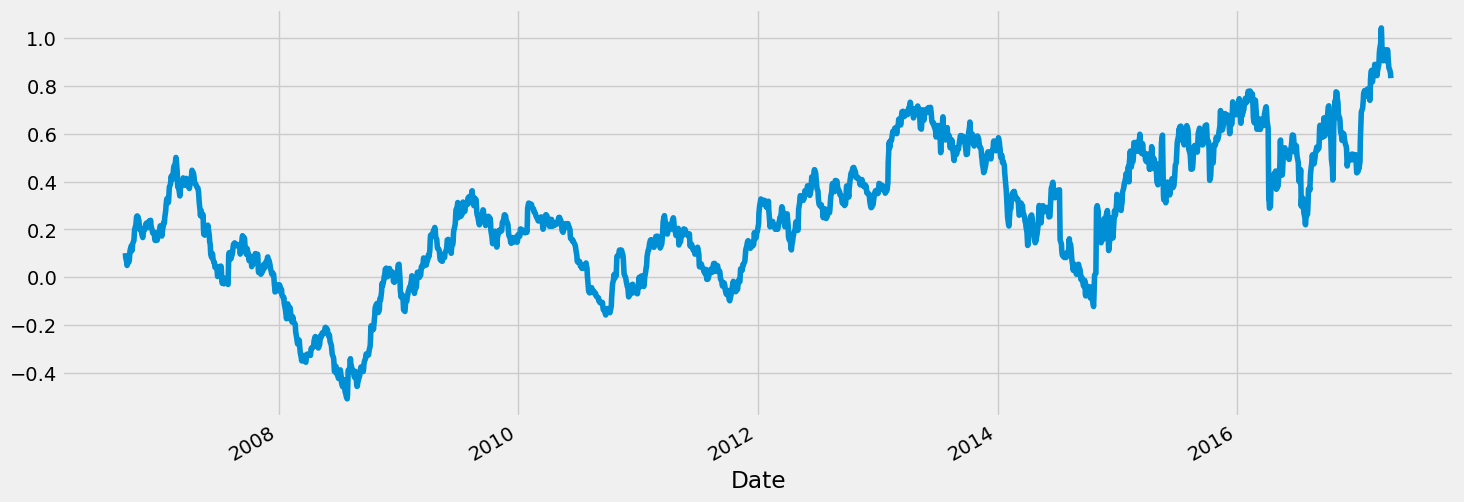

In [84]:
# The new stationary plot
decomposed_google_volume.trend.diff().plot()

# 4. Predicting the closing price stock price of Google inc:

In [86]:
# Fetch Google's stock data
df = yf.download('GOOGL', start='2012-01-01', end=datetime.datetime.now())

print(df)


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker           GOOGL       GOOGL       GOOGL       GOOGL       GOOGL   
Date                                                                     
2012-01-03   16.610771   16.651901   16.720470   16.325577   16.339840   
2012-01-04   16.682417   16.723724   16.773024   16.532032   16.642391   
2012-01-05   16.451006   16.491741   16.615866   16.422173   16.569820   
2012-01-06   16.226587   16.266768   16.516518   16.261011   16.495245   
2012-01-09   15.538601   15.577077   16.191191   15.546296   16.178679   
...                ...         ...         ...         ...         ...   
2024-11-22  164.759995  164.759995  166.460007  163.899994  165.850006   
2024-11-25  167.649994  167.649994  168.630005  165.610001  166.089996   
2024-11-26  169.119995  169.119995  169.820007  167.580002  167.630005   
2024-11-27  169.229996  169.229996  169.479996  168.020004  169.000000   
2024-11-29  168.949997  168.949997  16

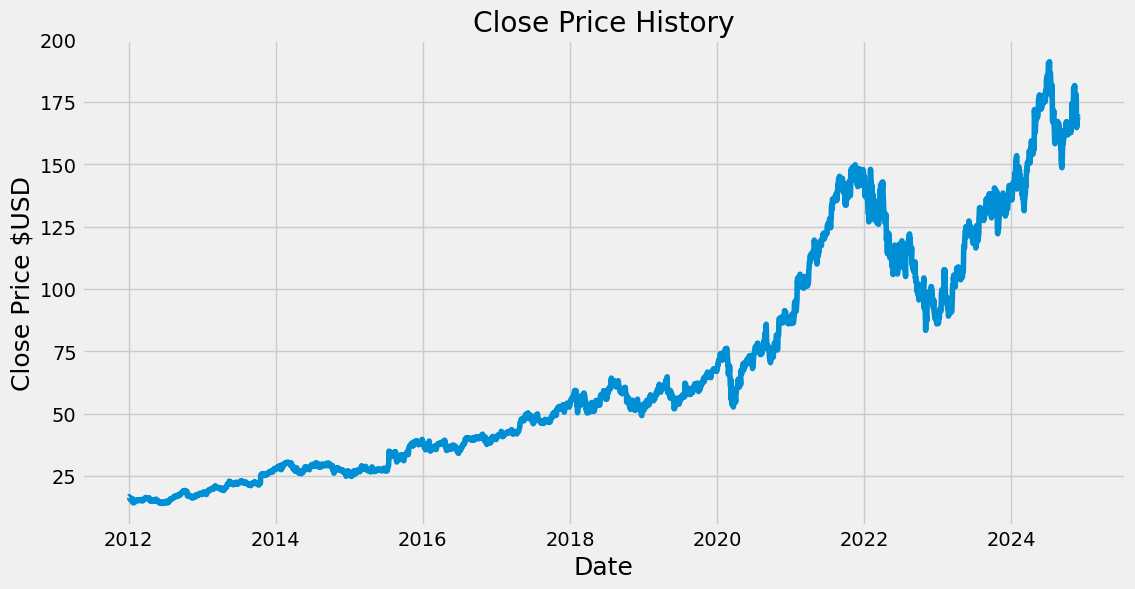

In [87]:
plt.figure(figsize = (12,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price $USD', fontsize =18)
plt.show()

In [88]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len


3087

In [89]:
print(df.columns)

MultiIndex([('Adj Close', 'GOOGL'),
            (    'Close', 'GOOGL'),
            (     'High', 'GOOGL'),
            (      'Low', 'GOOGL'),
            (     'Open', 'GOOGL'),
            (   'Volume', 'GOOGL')],
           names=['Price', 'Ticker'])


In [90]:
# Check if the DataFrame is empty
print(df.empty)  # Returns True if the DataFrame is empty

False


In [91]:
data = df[['Close']]  # Use double brackets to return a DataFrame, not a Series

# Check the shape of the extracted data
print(data.shape)

(3249, 1)


In [92]:
# Convert the 'Close' column to a NumPy array
dataset = data.values

# Check the shape of the dataset
print(dataset.shape)

(3249, 1)


In [93]:
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the data
scaled_data = scaler.fit_transform(dataset)

# Check the scaled data
print(scaled_data)  # Print first 5 rows of scaled data

[[0.01502153]
 [0.01542688]
 [0.01411764]
 ...
 [0.87550071]
 [0.87612152]
 [0.8745413 ]]


In [94]:
# Create the training data set 
# Create the scaled training data set

train_data = scaled_data[0:int(training_data_len),:]

# Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
#train_data[i-60:i, 0]: This slices train_data from index i-60 to i, selecting 60 consecutive values (representing the last 60 days) for the input feature of the model.
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        


[array([0.01502153, 0.01542688, 0.01411764, 0.01284796, 0.00895558,
       0.00905162, 0.0094499 , 0.00996963, 0.0093129 , 0.00981993,
       0.01043146, 0.01137207, 0.00380482, 0.00373844, 0.00309018,
       0.00147448, 0.00127816, 0.00295601, 0.00263258, 0.00297437,
       0.00307605, 0.00368053, 0.00526516, 0.00706729, 0.00673963,
       0.00717463, 0.00740202, 0.00661818, 0.00750653, 0.00716192,
       0.00656874, 0.00670433, 0.00643881, 0.00776075, 0.00690488,
       0.00664642, 0.0071817 , 0.00709837, 0.00838076, 0.00836099,
       0.00894711, 0.00878469, 0.00779606, 0.006484  , 0.00674387,
       0.00679189, 0.00581879, 0.00651084, 0.00829461, 0.0080418 ,
       0.00876774, 0.00931996, 0.01058258, 0.01051338, 0.01142998,
       0.01228726, 0.0117986 , 0.0127505 , 0.01242426, 0.01365863])]
[0.012620575059903313]

[array([0.01502153, 0.01542688, 0.01411764, 0.01284796, 0.00895558,
       0.00905162, 0.0094499 , 0.00996963, 0.0093129 , 0.00981993,
       0.01043146, 0.01137207, 0.0

train_data[i-60:i, 0]: This slices train_data from index i-60 to i, selecting 60 consecutive values (representing the last 60 days) for the input feature of the model.
    
train_data[i-60:i, 0] accesses the first column (the 'Close' prices) for each sequence.

x_train.append(...): Adds the 60-day window (sequence) to the x_train list.

Convert x_train to a NumPy array: After the loop, x_train will be a list, so we convert it to a NumPy array for easier manipulation and use in machine learning models.

In [96]:
# Convert the x_train and y_train to numpy arrays 

x_train,y_train = np.array(x_train),np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3027, 60, 1)

In [97]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


# Compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model

model.fit(x_train,y_train, batch_size = 1, epochs = 1 )

3027/3027 ━━━━━━━━━━━━━━━━━━━━ 112s 35ms/step - loss: 0.0018


In [98]:
# creating testing dataset

test_data = scaled_data[training_data_len - 60:,:]

# Create the data sets x_test and y_test

x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


#Selecting the Test Data:

training_data_len: This is the length of the training data. You previously calculated this as 95% of the total data.

scaled_data: This is the normalized version of your data, which has been scaled using the MinMaxScaler (i.e., values between 0 and 1).

training_data_len - 60: Since you're using a sliding window of 60 days for the training data, the test data should start 60 data points before the end of the training data. This way, you have the last 60 days of data as a sequence for testing the model on future predictions.

:: This indicates that you're selecting all columns in the second dimension. If scaled_data is a 2D array (with shape (n_samples, n_features)), you're keeping all columns for the test data.

In [100]:
# Convert the data to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

x_test

array([[[0.72520991],
        [0.71945335],
        [0.73079709],
        ...,
        [0.79496565],
        [0.80484206],
        [0.80224594]],

       [[0.71945335],
        [0.73079709],
        [0.74716378],
        ...,
        [0.80484206],
        [0.80224594],
        [0.82070075]],

       [[0.73079709],
        [0.74716378],
        [0.74496275],
        ...,
        [0.80224594],
        [0.82070075],
        [0.81121935]],

       ...,

       [[0.80913122],
        [0.80399546],
        [0.80845401],
        ...,
        [0.86709171],
        [0.85089432],
        [0.86720452]],

       [[0.80399546],
        [0.80845401],
        [0.77278599],
        ...,
        [0.85089432],
        [0.86720452],
        [0.87550071]],

       [[0.80845401],
        [0.77278599],
        [0.76031353],
        ...,
        [0.86720452],
        [0.87550071],
        [0.87612152]]])

In [101]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

predictions

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step


array([[141.04265],
       [142.24844],
       [142.96945],
       [142.76607],
       [142.21092],
       [141.88158],
       [141.8095 ],
       [141.43716],
       [141.5384 ],
       [142.18474],
       [143.05016],
       [143.12585],
       [146.35469],
       [148.52843],
       [149.19789],
       [149.43788],
       [150.02708],
       [150.69438],
       [151.41562],
       [152.65927],
       [153.36055],
       [153.86502],
       [153.89056],
       [153.86403],
       [154.07558],
       [154.77823],
       [155.83176],
       [157.15944],
       [158.44391],
       [159.60884],
       [160.12927],
       [159.70853],
       [159.39836],
       [159.47432],
       [159.54543],
       [158.7962 ],
       [158.07495],
       [157.66585],
       [157.59174],
       [158.00365],
       [158.76352],
       [158.96945],
       [159.08765],
       [159.48114],
       [160.1083 ],
       [160.08821],
       [160.23584],
       [160.47417],
       [160.21838],
       [160.14111],


In [102]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

15.942530596423126

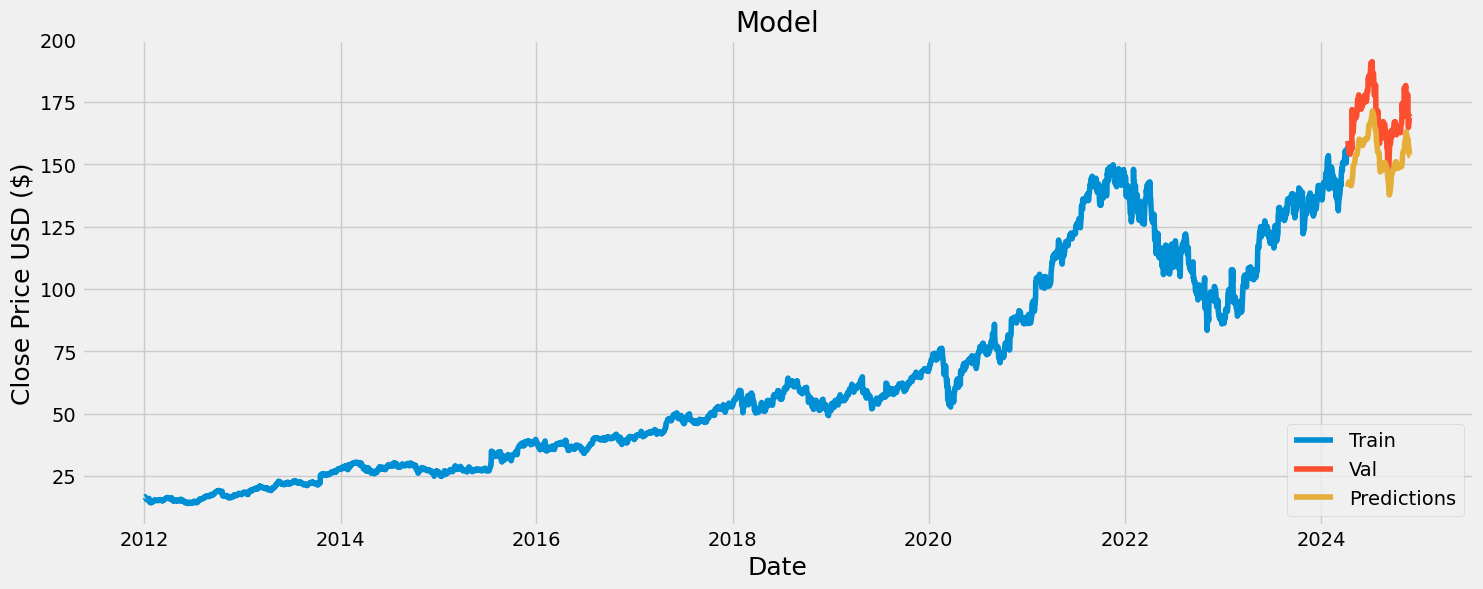

In [103]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [104]:
valid

Price,Close,Predictions
Ticker,GOOGL,
Date,,
2024-04-11,159.410004,141.042648
2024-04-12,157.729996,142.248444
2024-04-15,154.860001,142.969452
2024-04-16,154.399994,142.766068
2024-04-17,155.470001,142.210922
...,...,...
2024-11-22,164.759995,158.088516
2024-11-25,167.649994,155.566177
